In [187]:
# import 
import pandas as pd
import numpy as np
import datetime as dt
import time 
%matplotlib inline 
import matplotlib.pyplot as plt 

In [191]:
# load csv file 
load_file = '/Users/farahshamout/Desktop/RAIL/data.csv'
data = pd.read_csv(load_file)

In [200]:
data.describe()

,term,bmi,age,tonsilsize,nrem,rem,sleepefficiency,arousali,tst50co2,zscore,ahi,oahi,cai,oai,ohi,lowsao2,peakc02,tb90
count,439.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,0.102506,26.863047,10.508655,2.385965,72.708991,16.980702,81.726096,15.389254,7.815132,1.590278,11.858553,8.698684,0.664474,3.896996,5.417390,88.046053,48.298246,1.407018
std,0.303658,10.561774,4.759669,0.942373,35.218159,6.601057,13.825466,15.924183,19.326153,1.097054,23.614481,16.209962,1.964702,15.446075,16.264809,7.116616,6.134650,6.196213
min,0.000000,14.161674,2.058864,1.000000,22.800000,0.000000,8.300000,1.600000,0.000000,-1.135029,0.000000,0.000000,0.000000,-0.200000,0.000000,51.000000,32.000000,0.000000
25%,0.000000,17.922654,5.823409,2.000000,68.000000,13.400000,75.700000,7.800000,0.000000,0.933396,0.900000,0.600000,0.000000,0.000000,0.000000,86.000000,44.000000,0.000000
50%,0.000000,24.472229,12.073973,2.000000,72.600000,17.800000,85.450000,10.850000,0.000000,1.883140,3.400000,2.600000,0.200000,0.200000,0.850000,90.000000,48.000000,0.000000
75%,0.000000,33.120368,14.447945,3.000000,76.900000,21.125000,91.625000,16.125000,1.400000,2.416769,11.225000,9.400000,0.600000,1.592500,3.720000,92.250000,52.000000,0.225000
max,1.000000,72.797430,17.954826,4.000000,793.700000,31.100000,99.000000,128.800000,99.600000,4.990000,187.700000,124.700000,31.000000,188.500000,188.500000,98.000000,80.000000,64.000000


In [192]:
# Initial statistics i.e. gender, age, and investigations of asthma, allergies and gerd 
# Note that:
    #AAG refers to asthma AND allergies AND gerd
    
stats_labels = ['% of patient cohort', 
                'Average age', 
                '% OSA (ahi>5)', 
                '%allergies ',
                '%allergies AND OSA',
                '%asthma', 
                '%asthma AND OSA',
                '%gerd ',
                '% gerd AND OSA',
                '% AAG',                
                '% AAG AND OSA']
data_male = data.loc[data['gender'] == 'Male']
data_female = data.loc[data['gender'] == 'Female']
init_stats_dict = {'All': [100, 
                           data['age'].mean(), 
                           len(data.loc[data['ahi']>5])*100/len(data),
                           len(data.loc[data['allergies']=='Yes'])*100/len(data), 
                           len(data.loc[(data['allergies']=='Yes') & (data['ahi']>5)])*100/len(data), 
                           len(data.loc[data['asthma']=='Yes'])*100/len(data), 
                           len(data.loc[(data['asthma']=='Yes')& (data['ahi']>5)])*100/len(data), 
                           len(data.loc[data['gerd']=='Yes'])*100/len(data),
                           len(data.loc[(data['gerd']=='Yes')& (data['ahi']>5)])*100/len(data),
                           len(data.loc[(data['gerd']=='Yes')& (data['asthma']=='Yes') & (data['allergies']=='Yes')])*100/len(data),
                           len(data.loc[(data['gerd']=='Yes')& (data['asthma']=='Yes') & (data['allergies']=='Yes') &(data['ahi']>5)])*100/len(data)], 
                   'Females':[len(data_female)*100/len(data), 
                            data_female['age'].mean(), 
                            len(data_female.loc[data_female['ahi']>5])*100/len(data_female),
                            len(data_female.loc[data_female['allergies']=='Yes'])*100/len(data_female), 
                            len(data_female.loc[(data_female['allergies']=='Yes')& (data_female['ahi']>5)])*100/len(data_female),
                            len(data_female.loc[data_female['asthma']=='Yes'])*100/len(data_female), 
                            len(data_female.loc[(data_female['asthma']=='Yes') & (data_female['ahi']>5)])*100/len(data_female), 
                            len(data_female.loc[data_female['gerd']=='Yes'])*100/len(data_female),
                            len(data_female.loc[(data_female['gerd']=='Yes') & (data_female['ahi']>5)])*100/len(data_female),
                            len(data_female.loc[(data_female['gerd']=='Yes')& (data_female['asthma']=='Yes') & (data_female['allergies']=='Yes')])*100/len(data_female), 
                            len(data_female.loc[(data_female['gerd']=='Yes')& (data_female['asthma']=='Yes') & (data_female['allergies']=='Yes') &(data_female['ahi']>5)])*100/len(data_female)], 
                   'Males':[len(data_male)*100/len(data), 
                            data_male['age'].mean(), 
                            len(data_male.loc[data_male['ahi']>5])*100/len(data_male),
                            len(data_male.loc[data_male['allergies']=='Yes'])*100/len(data_male), 
                            len(data_male.loc[(data_male['allergies']=='Yes')& (data_male['ahi']>5)])*100/len(data_male), 
                            len(data_male.loc[data_male['asthma']=='Yes'])*100/len(data_male),
                            len(data_male.loc[(data_male['asthma']=='Yes') & (data_male['ahi']>5)])*100/len(data_male),
                            len(data_male.loc[data_male['gerd']=='Yes'])*100/len(data_male),
                            len(data_male.loc[(data_male['gerd']=='Yes')& (data_male['ahi']>5)])*100/len(data_male),
                            len(data_male.loc[(data_male['gerd']=='Yes')& (data_male['asthma']=='Yes') & (data_male['allergies']=='Yes')])*100/len(data_male), 
                            len(data_male.loc[(data_male['gerd']=='Yes')& (data_male['asthma']=='Yes') & (data_male['allergies']=='Yes') & (data_male['ahi']>5)])*100/len(data_male)], 
                  }
init_stats_df = pd.DataFrame(init_stats_dict, index = stats_labels )

init_stats_df

,All,Females,Males
% of patient cohort,100.000000,47.807018,52.192982
Average age,10.508655,10.785476,10.255096
% OSA (ahi>5),40.570175,36.238532,44.537815
%allergies,35.087719,37.614679,32.773109
%allergies AND OSA,14.254386,14.220183,14.285714
%asthma,28.728070,26.146789,31.092437
%asthma AND OSA,11.184211,9.174312,13.025210
%gerd,7.017544,5.963303,7.983193
% gerd AND OSA,1.973684,1.834862,2.100840
% AAG,3.289474,3.211009,3.361345


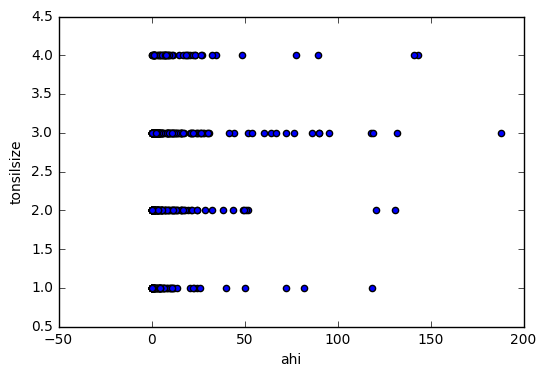

In [194]:
# Investigation of tonsil size 
data.plot(kind = 'scatter', x='ahi', y='tonsilsize')

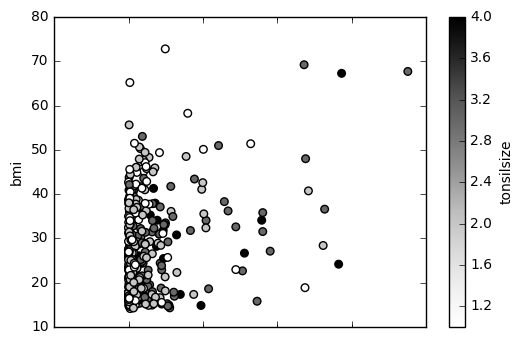

In [183]:
# Investigation of bmi
data.plot(kind = 'scatter', x='ahi', y='bmi', c = 'tonsilsize', s = 30, sharex = 'false')

<function matplotlib.pyplot.show>

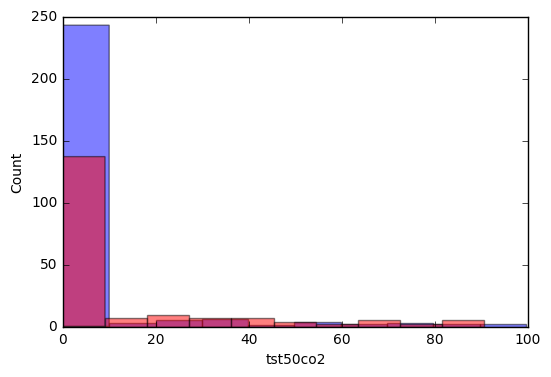

In [199]:
# Extract data diagnosed by OSA based on ahi
# ahi 
OSA_data = data.loc[data['ahi']>5]
non_OSA = data.loc[data['ahi'] <=5]
plt.hist(non_OSA['tst50co2'], alpha = 0.5)
plt.hist(OSA_data['tst50co2'], color = 'red', alpha = 0.5)
plt.ylabel('Count')
plt.xlabel('tst50co2')
plt.show